In [35]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, roc_curve
import seaborn as sns

In [2]:
# Load data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [15]:
# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# Flatten 2D array
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train = x_train.reshape((50000, 32*32*3))
x_test = x_test.reshape((10000, 32*32*3))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


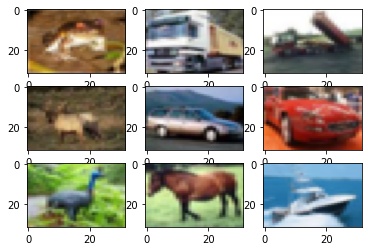

In [8]:
# Visualize some images
fig, ax = plt.subplots(3,3)
k = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
plt.show()

In [33]:
# Tune k value of KNN
k_values = [2, 4, 6, 8, 10, 12, 14]
for k in k_values:
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(x_train, y_train)
  y_pred = knn_classifier.predict(x_test)
  acc = accuracy_score(y_pred, y_test)
  print('k:', k,'Accuracy: ', acc)

k: 2 Accuracy:  0.3116
k: 4 Accuracy:  0.3398
k: 6 Accuracy:  0.34
k: 8 Accuracy:  0.3415
k: 10 Accuracy:  0.3386
k: 12 Accuracy:  0.3428
k: 14 Accuracy:  0.3407


In [34]:
# Train and fit KNN classifier 
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

Accuracy:  0.3428


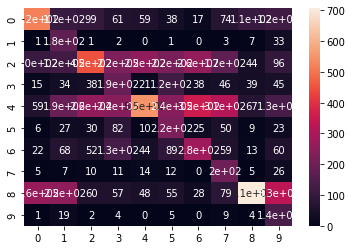

In [36]:
# Plot confusion matrix
cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(cf_matrix, annot=True)

In [31]:
# Train decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0, min_samples_split = 2, max_depth = 6, criterion='gini')
dt_classifier .fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [32]:
# Get accuracy score
y_pred = dt_classifier.predict(x_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)

Accuracy:  0.1


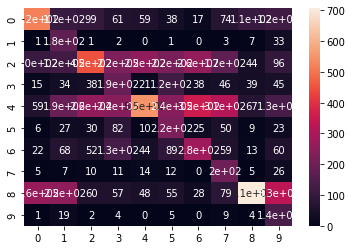

In [40]:
# Plot confusion matrix
cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(cf_matrix, annot=True)